In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('House Price India.csv')
print(df.head())
print(df.info())


           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [4]:
# Fill missing values
df.fillna(df.mean(), inplace=True)

# Convert categorical variables (if any) into dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('number of bedrooms',axis=1)   # Features
y = df['Price']               # Target


count    1.462000e+04
mean     5.389322e+05
std      3.675324e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64


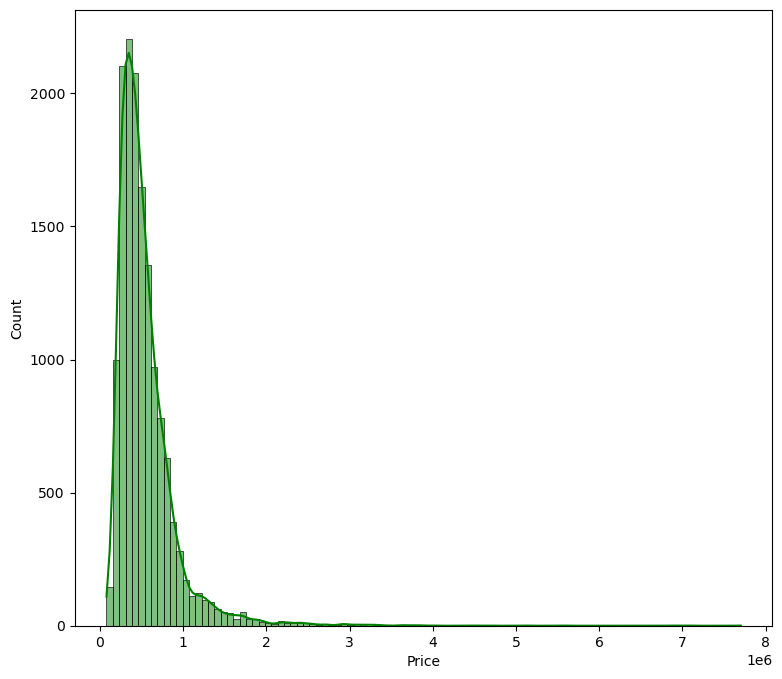

In [9]:
print(df['Price'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(data=df, x='Price', color='g', bins=100, kde=True)
plt.show()

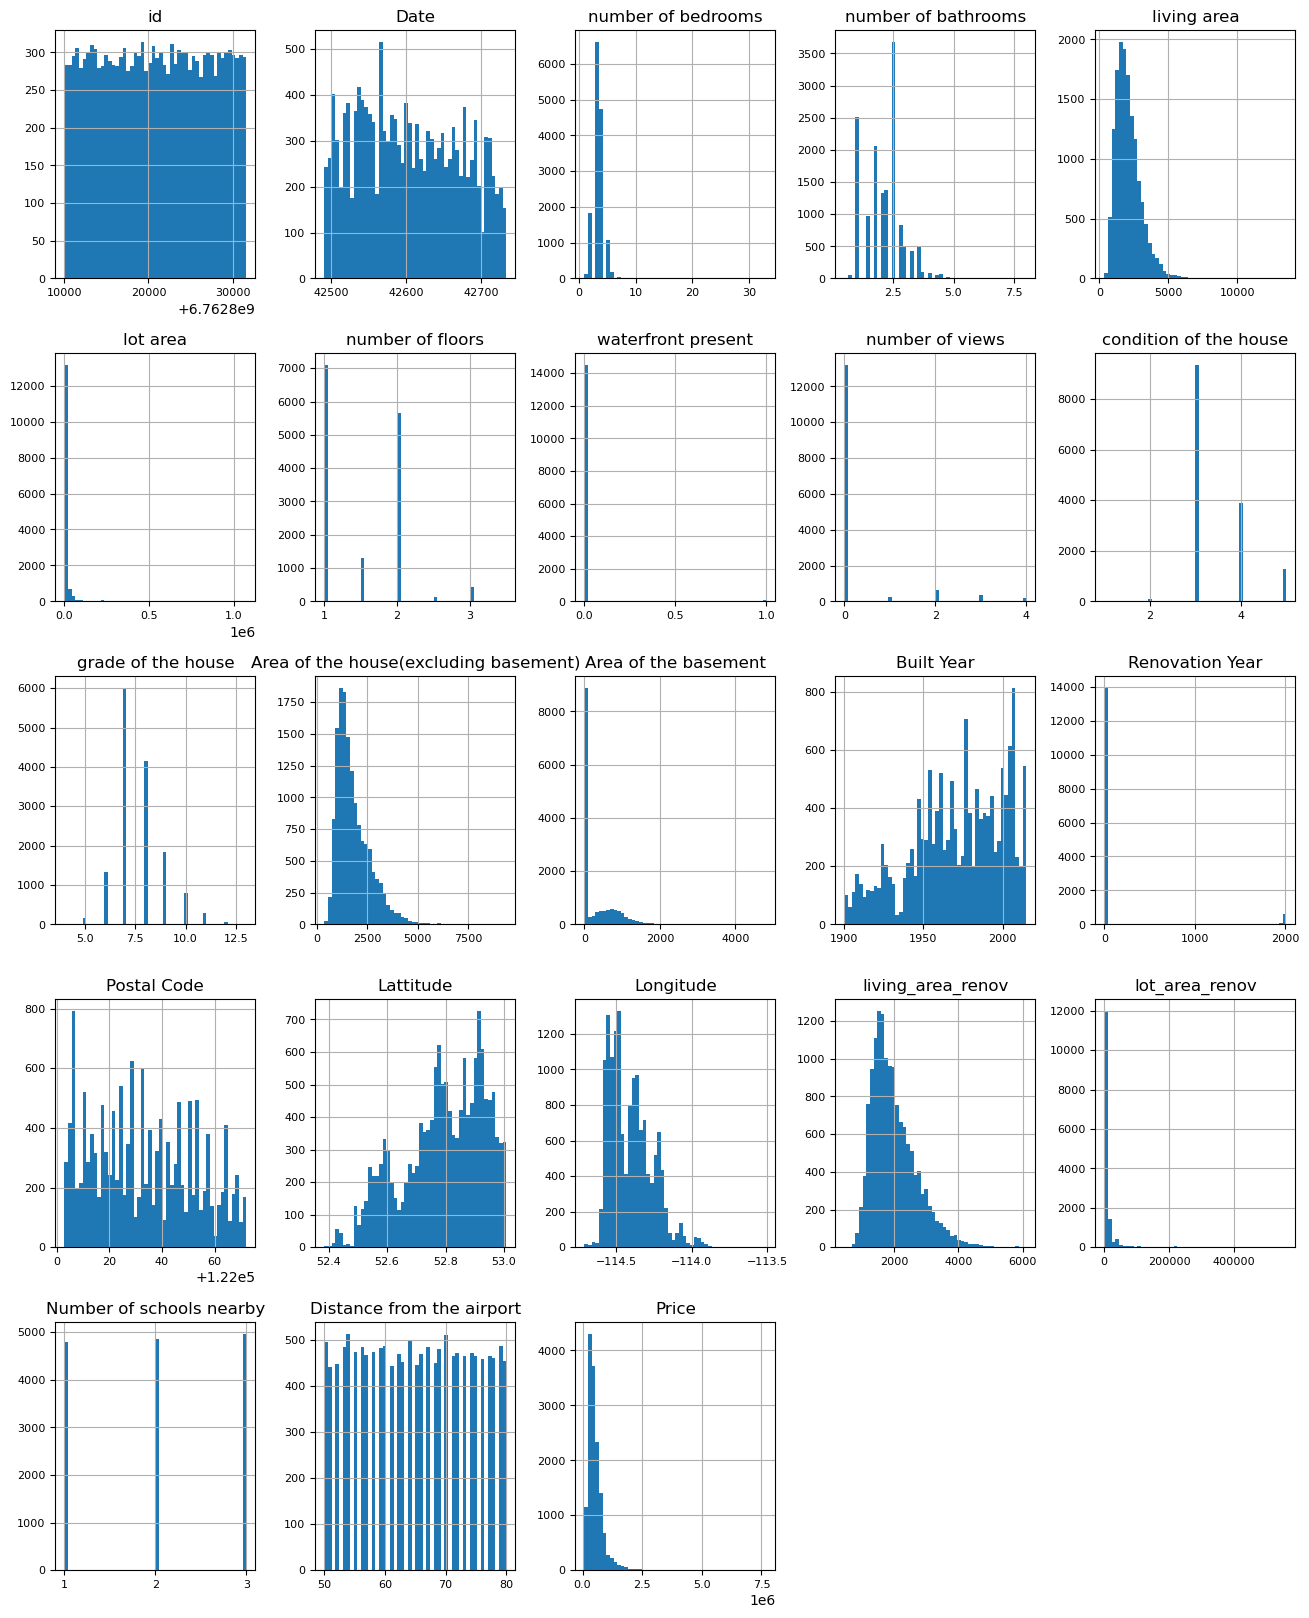

In [8]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [28]:
y_pred = model.predict(X_test)


In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Root Mean Squared Error: 187162.34642190396
R² Score: 0.7514192105749721


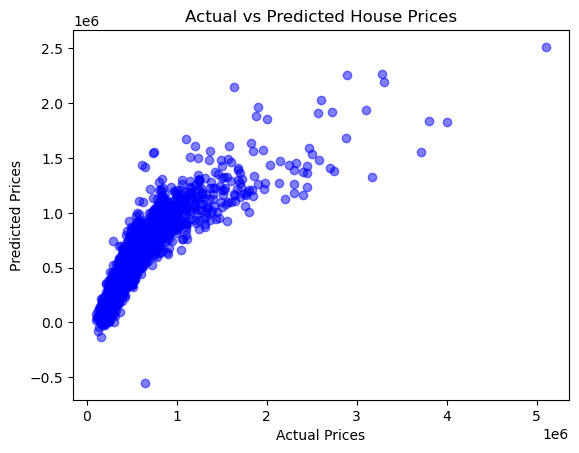

In [30]:
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
